In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,15)

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df1 = pd.read_csv('/Users/rodney/Documents/Jupyter/HW_IE_691/HW_1/PCD_Train_2.csv')
df2 = pd.read_csv('/Users/rodney/Documents/Jupyter/HW_IE_691/HW_1/PCD_Test_2.csv')

df1 = df1.drop(columns=['train'])
df2 = df2.drop(columns=['train'])

# NOTE:
## These next two shells center the data for the train and test sets

In [3]:
df1 = df1.apply(lambda x: x-x.mean())
df1 = df1.subtract(df1.mean())

In [4]:
df2 = df2.apply(lambda x: x-x.mean())
df2 = df2.subtract(df2.mean())

In [5]:
X_train = df1[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]#.values
y_train = df1['lpsa']#.values

X_test = df2[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]#.values
y_test = df2['lpsa']#.values

print (X_train)
print (y_train)
# print (X_test)
# print (y_test)

      lcavol   lweight        age      lbph       svi       lcp   gleason  \
0  -1.893310 -0.856649 -14.746269 -1.457734 -0.223881 -1.172091 -0.731343   
1  -2.307744 -0.306482  -6.746269 -1.457734 -0.223881 -1.172091 -0.731343   
2  -1.824317 -0.934865   9.253731 -1.457734 -0.223881 -1.172091  0.268657   
3  -2.517464 -0.343319  -6.746269 -1.457734 -0.223881 -1.172091 -0.731343   
4  -0.562075 -0.193735  -2.746269 -1.457734 -0.223881 -1.172091 -0.731343   
5  -2.363314 -0.397282 -14.746269 -1.457734 -0.223881 -1.172091 -0.731343   
6  -0.620344 -0.086599  -6.746269  1.465427 -0.223881 -1.172091 -0.731343   
7  -1.058849 -0.021970   0.253731 -1.457734 -0.223881 -1.172091 -0.731343   
8  -2.660565 -0.027427  -1.746269  1.195508 -0.223881 -1.172091 -0.731343   
9   0.299938 -0.603247  -1.746269 -1.457734 -0.223881 -0.383634  0.268657   
10  0.163557 -0.627879   2.253731 -1.457734 -0.223881 -1.172091  0.268657   
11  0.227668 -0.565056   1.253731 -1.457734 -0.223881 -1.172091 -0.731343   

# Ridge Regression

In [6]:
# Ridge regression model
def SolveRidgeRegression(X, y):
    wRR_list = []
    df_list = []
    for i in range(0, 5001, 1):
        lam_par = i
        xtranspose = np.transpose(X)
        xtransx = np.dot(xtranspose, X)
        if xtransx.shape[0] != xtransx.shape[1]:
            raise ValueError('Needs to be a square matrix for inverse')
        lamidentity = np.identity(xtransx.shape[0]) * lam_par
        matinv = np.linalg.inv(lamidentity + xtransx)
        xtransy = np.dot(xtranspose, y)
        wRR = np.dot(matinv, xtransy)
        _, S, _ = np.linalg.svd(X)
        df = np.sum(np.square(S) / (np.square(S) + lam_par))
        wRR_list.append(wRR)
        df_list.append(df)
    return wRR_list, df_list



# Effective Degrees of Freedom (lambda) vs Coefficients Plot
def makeDFPlots(dfArray, wRRArray):
    #print wRR_array.shape, df_array.shape
    plt.figure()
    colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#838b8b']
    labels = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
    for i in range(0, wRR_list[0].shape[0]):
        plt.plot(dfArray, wRRArray[:,i], color = colors[i])
        plt.scatter(dfArray, wRRArray[:,i], color = colors[i], s = 8, label=labels[i])
    # df(lambda)
    plt.xlabel(r"df($\lambda$)")
    plt.ylabel("Coefficients")
    # and a legend
    plt.legend(loc='upper left')
    plt.show()

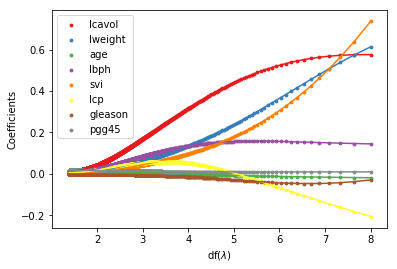

In [7]:
wRR_list, df_list = SolveRidgeRegression(X_train, y_train)
wRRArray = np.asarray(wRR_list)
dfArray = np.asarray(df_list)

makeDFPlots(dfArray, wRRArray)